<a href="https://www.kaggle.com/mayowaakinmolayan/getting-started-with-titanic?scriptVersionId=84123903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn import preprocessing

%matplotlib inline

In [3]:
#loading the datset
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Renaming the pclass column
train_df.rename(columns={'Pclass' : 'Ticket_Class'}, inplace=True)
#shape of the dataframe
print('The dataframe has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))
display(train_df.dtypes.value_counts())

The dataframe has 891 rows and 12 columns


int64      5
object     5
float64    2
dtype: int64

In [6]:
#finding the columns with numerical variables
numerical_cols = train_df.dtypes != 'object'
numerical_cols = train_df.columns[numerical_cols].tolist()
#finding the columns with categorical variables
categorical_cols = train_df.dtypes == 'object'
categorical_cols = train_df.columns[categorical_cols].tolist()

print('The numerical columns are: ',numerical_cols)
print('The categorical columns are: ',categorical_cols)

The numerical columns are:  ['PassengerId', 'Survived', 'Ticket_Class', 'Age', 'SibSp', 'Parch', 'Fare']
The categorical columns are:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [7]:
#checking for columns with missing values
train_df.isnull().sum()

PassengerId       0
Survived          0
Ticket_Class      0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [8]:
#replacing missing values in the age column
mean= train_df['Age'].mean()
mean = round(mean)

train_df['Age'] = train_df['Age'].fillna(mean)
train_df.tail(5)

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
#fetching rows with missing embarked columns
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [11]:
#changing the values in sex to numerical variables
train_df['Sex'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace=True)
train_df.head()

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#creating independent and dependent variables
Features = train_df[['Ticket_Class', 'Sex', 'Age', 'SibSp', 'Parch']]
Features = pd.concat([Features, pd.get_dummies(train_df['Embarked'])], axis=1)
Features.head()

,Ticket_Class,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [13]:
#Feature Selection 
X = Features
y = train_df['Survived']

In [14]:
#Data Standardardization
from sklearn.preprocessing import StandardScaler
#definestandard scaler
scaler = StandardScaler()

#transform data
X = scaler.fit_transform(X)

print(X)

[[ 0.82737724 -0.73769513 -0.59705478 ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693  1.35557354  0.63416229 ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724  1.35557354 -0.28925051 ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [ 0.82737724  1.35557354  0.01855376 ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693 -0.73769513 -0.28925051 ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724 -0.73769513  0.17245589 ... -0.48204268  3.25137334
  -1.62380254]]


In [15]:
X.shape

(891, 8)

In [16]:
#splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4, shuffle=True)

In [17]:
print('The shape of the training set is: ', X_train.shape, y_train.shape)
print('The shape of the test set is: ', X_test.shape, y_test.shape)

The shape of the training set is:  (623, 8) (623,)
The shape of the test set is:  (268, 8) (268,)


In [18]:
#modelling
#from sklearn.neighbors import KNeighborsClassifier
#k = 3
#Train Model and Predict  
#kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
#kNN_model

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [20]:
#y_hat = kNN_model.predict(X_test)
#y_hat[0:5]

In [21]:
y_hat = clf.predict(X_test)
y_hat[0:5]

array([0, 0, 1, 1, 0])

In [22]:
#choosing the best k
#Ks = 15
#mean_acc = np.zeros((Ks-1))

#for n in range(1, Ks):
    #kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    #y_hat = kNN_model.predict(X_test)
    
    #mean_acc[n-1] = np.mean(y_hat == y_test);
    
#mean_acc

In [23]:
#best k=8
#k = 8
#kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
#kNN_model

In [24]:
#y_hat = kNN_model.predict(X_test)
#y_hat[0:5]

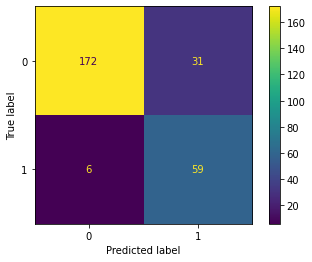

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_hat, y_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [26]:
from sklearn.metrics import f1_score
f1_score(y_hat, y_test, average='weighted')

0.868544627636519

In [27]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
#test data preprocessing

#encoding sex variables
test_df['Sex'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace=True)


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
#filling the missing age values with the average age
test_age = test_df['Age'].mean()
test_age = round(test_age)
test_df['Age'] = test_df['Age'].fillna(test_age)

In [32]:
#filling the missing fare column
import random
test_df['Fare'] = test_df['Fare'].fillna(random.uniform(0.0, 512.3292))

In [33]:
test_df.rename(columns={'Pclass' : 'Ticket_Class'}, inplace=True)

In [34]:
test_features = test_df[['Ticket_Class', 'Sex', 'Age', 'SibSp', 'Parch']]
test_features = pd.concat([test_features, pd.get_dummies(test_df['Embarked'])], axis=1)
test_features.head()

,Ticket_Class,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,34.5,0,0,0,1,0
1,3,1,47.0,1,0,0,0,1
2,2,0,62.0,0,0,0,1,0
3,3,0,27.0,0,0,0,0,1
4,3,1,22.0,1,1,0,0,1


In [35]:
#Feature selection
test_X = test_features

#preprocessing
test_X = preprocessing.StandardScaler().fit_transform(test_X)
test_X[0:5]

array([[ 0.87348191, -0.75592895,  0.33942386, -0.49947002, -0.4002477 ,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191,  1.32287566,  1.32992353,  0.61699237, -0.4002477 ,
        -0.56814154, -0.35164743,  0.74037028],
       [-0.31581919, -0.75592895,  2.51852314, -0.49947002, -0.4002477 ,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191, -0.75592895, -0.25487594, -0.49947002, -0.4002477 ,
        -0.56814154, -0.35164743,  0.74037028],
       [ 0.87348191,  1.32287566, -0.65107581,  0.61699237,  0.61989583,
        -0.56814154, -0.35164743,  0.74037028]])

In [36]:
#y_preds = kNN_model.predict(test_X)
#y_preds[:]
y_preds = clf.predict(test_X)
y_preds[0:5]

array([0, 0, 0, 0, 0])

In [37]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_preds})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
